In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

#Librerias antes no vistas
from scipy import stats
from scipy.stats import norm, skew


pd.set_option('display.max_columns',None)


In [22]:
train=pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/House_pricing/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/House_pricing/test.csv')

# Presentacion del dataset Housing Price California

In [23]:
print('Para la data de train:', train.shape)
print('Para la data de test:',test.shape)

Para la data de train: (1460, 81)
Para la data de test: (1459, 80)


In [24]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


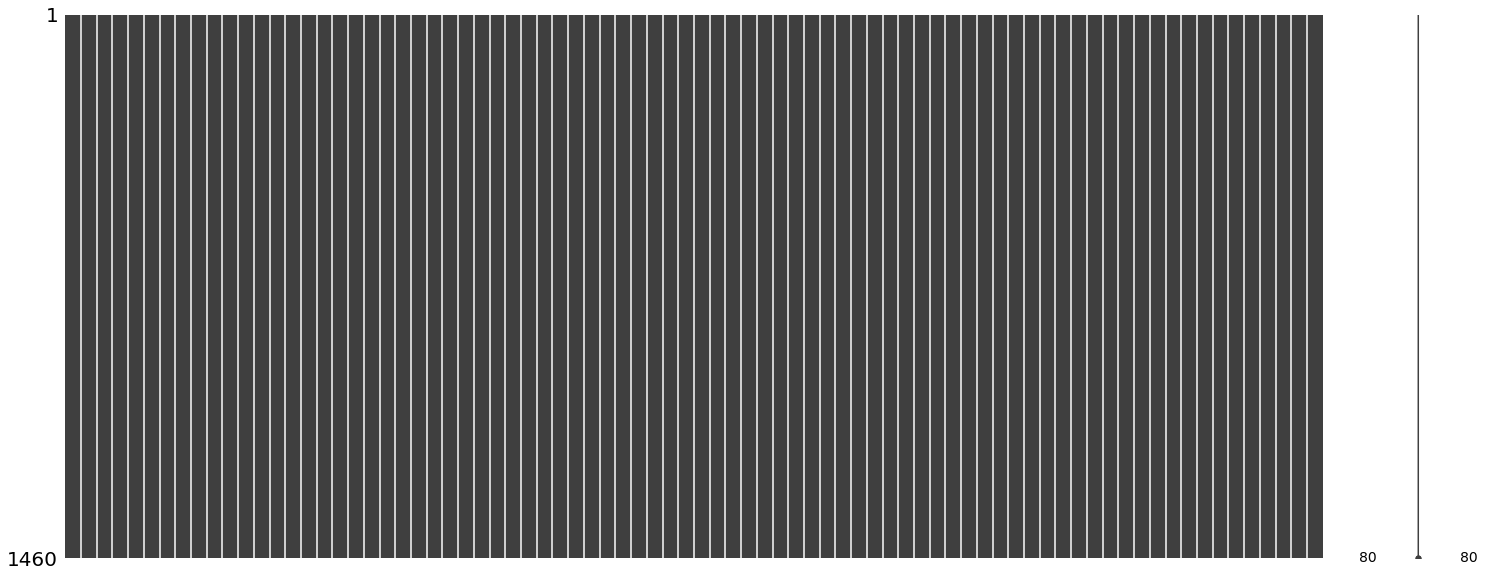

In [66]:
ms.matrix(train)

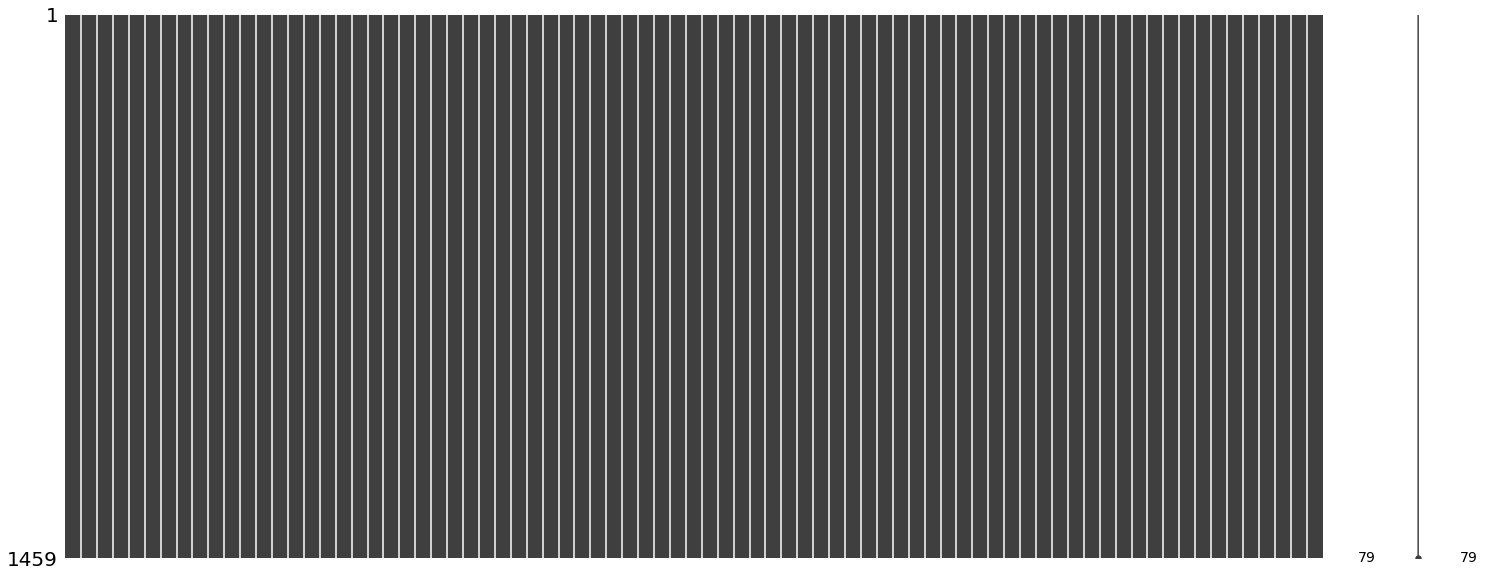

In [68]:
ms.matrix(test)

In [28]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id",axis=1,inplace=True)

### Limpiando Nulos

- Nulos categoricos.

- Nulos numéricos.

In [31]:
columnas_object_nulos = [col for col in test.columns if ((train[col].dtype =='object')|(test[col].dtype == 'object')&((train[col].isna().any()|(test[col].isna().any()))))]

In [32]:
def reemplazando_non_nans(df, lista_cols_obj_nulos):
    for col in lista_cols_obj_nulos:
        df[col].fillna("None",inplace=True)

In [34]:
reemplazando_non_nans(train,columnas_object_nulos)
reemplazando_non_nans(test,columnas_object_nulos)

In [57]:
for col in ['BsmtFinSF2','BsmtFullBath','BsmtHalfBath','GarageCars']:
    train.loc[train[col].isna(),col] = 0.0
    test.loc[test[col].isna(),col] = 0

In [63]:
lista_nulos_numericos = [col for col in test.columns if (test[col].isna().any())]

In [64]:
for col in lista_nulos_numericos:
    plt.title(train[col].isna().sum())
    sns.distplot(train[col].dropna())
    plt.show()

In [65]:
for col in lista_nulos_numericos:
    plt.title(test[col].isna().sum())
    sns.distplot(test[col].dropna())
    plt.show()

In [62]:
for col in lista_nulos_numericos:
    train[col].fillna(train[col].mean(),inplace=True)
    test[col].fillna(test[col].mean(),inplace=True)

### Exportando a csv

In [69]:
train.to_csv('train_limpio.csv',index=False)
test.to_csv('test_limpio.csv',index=False)

# Procesamiento de Datos

##### OUTLIERS

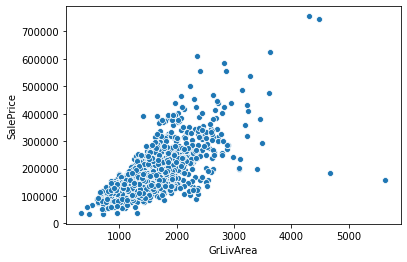

In [70]:
sns.scatterplot(x = train['GrLivArea'], y = train['SalePrice'])

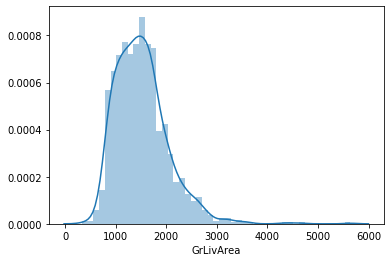

In [71]:
sns.distplot(train['GrLivArea'])

In [84]:
dict_outliers = {}
for col in train.columns:
    if train[col].dtype != 'object':        
        if train[col].kurt() > 20:
            dict_outliers[col] = train[col].kurt()
    else:
        pass

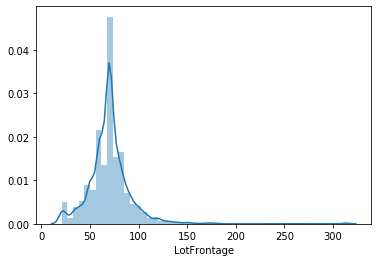

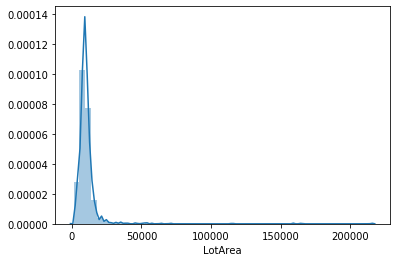

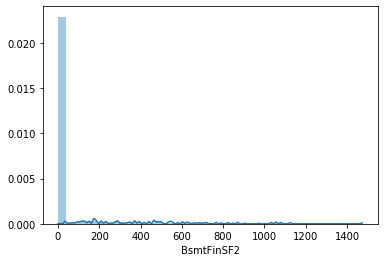

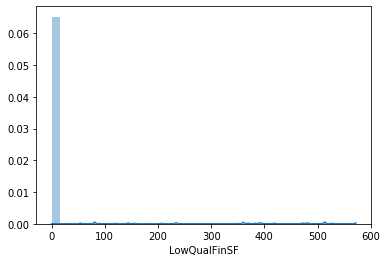

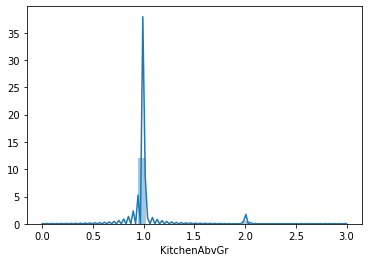

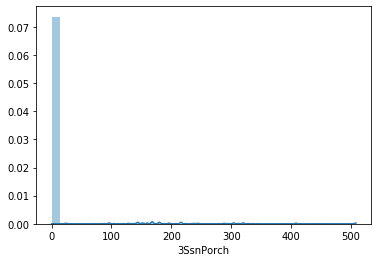

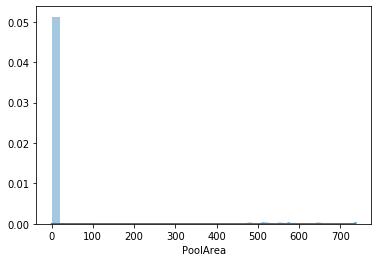

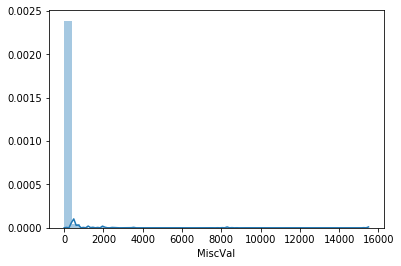

In [88]:
for k,v in dict_outliers.items():
    sns.distplot(train[k])
    plt.show()

Se puede apreciar en la esquina inferior derecha dos datos que indican un **AreaHabitable** muy grande, y sin embargo registran un bajo precio. Estos valores se consideran outliers. Por ello procederemos a eliminarlos.

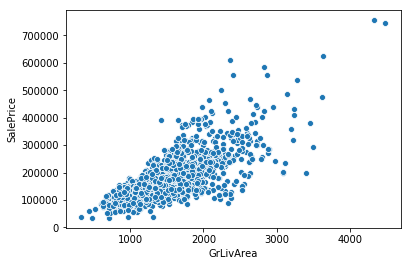

In [26]:
#Eliminamos los outliers acorde a las variables del gráfico
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Verificamos el gráfico nuevamente para confirmar que los outliers hayan sido eliminados
sns.scatterplot(x = train['GrLivArea'], y = train['SalePrice'])

Hay probabilidades de que otros valores atipicos existan en los datos de entrenamiento (si es que alli hubieran tambien outliers), sin embargo removerlos todos puede afectar negativamente nuestros modelos. Por ello vamos a permitir aquellos en los cuales los modelos son lo suficientemente robustos.

## Variable Objetivo

**Precio** es la variable que vamos a predecir. Asi que vamos a hacer un poco de analisis en esta variable primero.

In [99]:
from scipy.stats import norm, skew

Text(0.5, 1.0, 'Distribución del Precio')

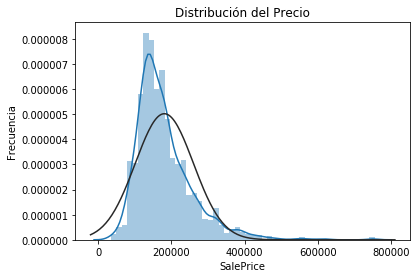

In [93]:
## Comparemos la distribución de Precio con una distribucion normal.
sns.distplot(train['SalePrice'], fit = norm)
plt.ylabel('Frecuencia')
plt.title('Distribución del Precio')

Se puede apreciar que los datos de la variable objetivo están inclinados a la izquierda. Sin embargo, los modelos lineales que veremos en la presente clase pueden optimizar su predición con datos distribuidos normalmente. Vamos a transformar los datos de esta variable para **aproximarlos a una distribución normal**.

 **Log-transformación de la variable objetivo**

Text(0.5, 1.0, 'Distribución del Precio Real Ajustado')

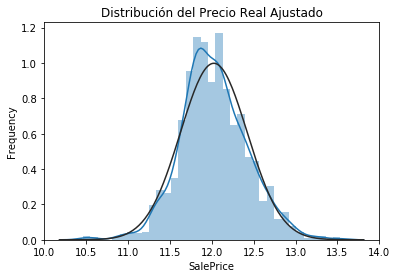

In [28]:
#Utilizamos la función log1p de la librería numpy que aplica la función log(1+x) a todos los elementos de la variable Precio
train["SalePrice"] = np.log1p(train["SalePrice"])

#Dibujamos la distribución actualizada de la variable Precio
sns.distplot(train['SalePrice'] , fit=norm);

plt.ylabel('Frequency')
plt.title('Distribución del Precio Real Ajustado')

**Vamos a revisar el archivo "DescripcionVariables.xlsx" el cual contiene un diccionario sobre el significado de las variables predictoras**

In [0]:
y_train = train.SalePrice.values
train.drop(['SalePrice'], axis=1, inplace=True)

**Correlación de los Datos**


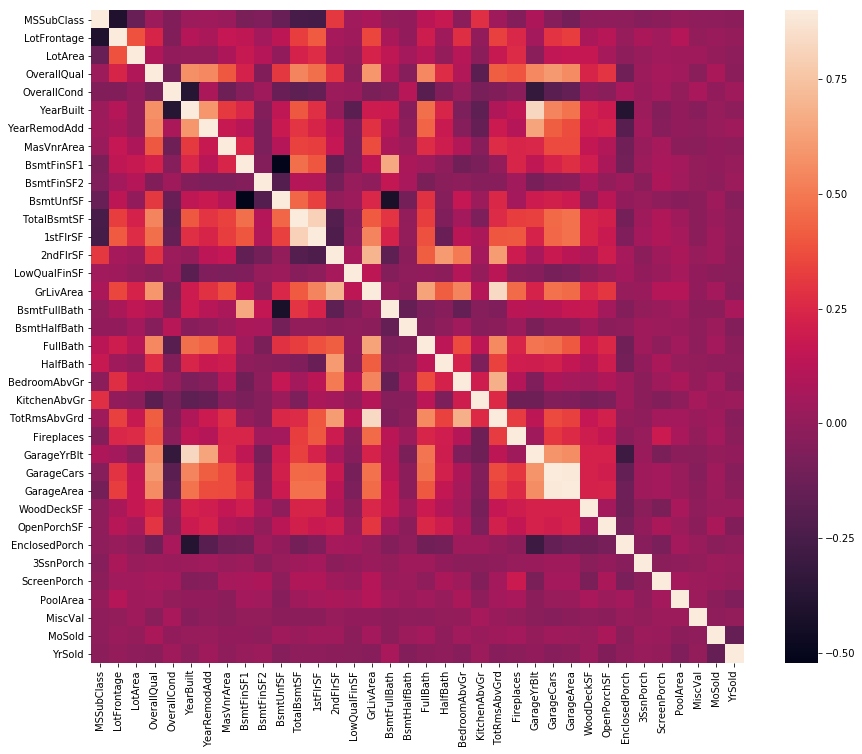

In [31]:
#Mapa de correlación para ver cómo las variables predictoras están correlacionadas con Precio
corrmat = train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Feature Engineering

**Transformando algunas variables númericas que realmente son categóricas**

In [95]:
#Cambiar las variables Año y Mes de venta de la casa a tipo entero
train['YrSold'] = train['YrSold'].astype(int)
train['MoSold'] = train['MoSold'].astype(int)

**Añadimos una variable importante**

Debido a que el área total es importante para predecir el precio de la casa, sumamos las tres variables **TotalSótano, 1erPiso, 2doPiso**

In [97]:
#Añadiendo tamaño total del area
train['TotalArea'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

**Detectamos el grado de asimetría de las variables predictoras** - Solo aquellas con data numérica

In [100]:
#Filtramos aquellas variables que tengan datos diferentes al tipo object, es decir numéricas
numeric_feats = train.dtypes[train.dtypes != "object"].index

#Aplicamos la función skew a las variables filtradas y mostramos el resultado ordenando de forma ascendente
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSesgo en características numéricas: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Sesgo en características numéricas: 



,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [102]:
skewness.Skew.unique()

array([24.45163962, 14.81313466, 12.19514213, 10.29375236,  9.00208042,
        4.48378409,  4.25088802,  4.11797738,  4.09918567,  3.08669647,
        2.67366126,  2.38249918,  2.36191193,  1.88094075,  1.77487373,
        1.6837709 ,  1.5397917 ,  1.52268809,  1.40621011,  1.37534174,
        1.36515595,  0.9193227 ,  0.81219427,  0.69235521,  0.67564577,
        0.67520283,  0.64889763,  0.59545404,  0.21672098,  0.21183506,
        0.21157244,  0.17979594,  0.09616958,  0.03652398, -0.3421969 ,
       -0.5030445 , -0.61283072, -0.66748815])

**Transformación Box Cox**

Usamos la transformación BoxCox de la librería scipy

In [ ]:
skewness = skewness[abs(skewness) > 1.5]
print("Hay {} características numéricas que se han transformado vía BoxCox".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train[feat] = boxcox1p(train[feat], lam)
    test[feat] = boxcox1p(test[feat,lam])

**Encodeamos rápidamente las variables categóricas**

In [106]:
cat_variables = [col for col in train.columns if train[col].dtype == 'object']

In [ ]:
cat_variables

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat in cat_variables:
    le.fit(list(train[cat].values)+list(test[cat].values))
    train[cat] = le.transform(train[cat])
    test[cat] = le.transform(test[cat])

# Modelos

**Importamos librerías**

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error

##Modelos Base

-  **Regresión Lasso**  : 

Este modelo es muy sensible a outliers, por ello necesitamos hacer más robusto el modelo a través del parámetro **Robustscaler** dentro de un pipeline

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

- **Regresión ElasticNet** :

Nuevamente ingresamos el parámetro **Robustscaler** dentro del pipeline para hacer más robusto el modelo

In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=1))

- **Regresión Kernel Ridge** :

In [0]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

# Evaluación de los Modelos Base

In [66]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1137 (0.0061)



In [67]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1137 (0.0062)



In [68]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1156 (0.0056)

